# DC Data Visualizations

### Vote Share Comparisons

We start off with our imports: 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Now we read in our vote share data: 

Vote share data from <br>
https://en.wikipedia.org/wiki/2012_United_States_presidential_election
https://en.wikipedia.org/wiki/2016_United_States_presidential_election
https://en.wikipedia.org/wiki/2020_United_States_presidential_election


In [2]:
our_2012_results = pd.read_csv('2012 data.csv', 
            sep="^",
           header = None)
our_2012_results.rename(columns={0: 'jurisdiction', 
                                 1: "Dem vote share 2012",  
                                 2: "GOP vote share 2012"}, inplace=True)
#our_2012_results

In [3]:
our_2016_results = pd.read_csv('2016 data.csv', 
            sep="^",
           header = None)
our_2016_results.rename(columns={0: 'jurisdiction', 
                                 1: "Dem vote share 2016",  
                                 2: "GOP vote share 2016"}, inplace=True)
#our_2016_results

In [4]:
our_2020_results = pd.read_csv('2020 data.csv', 
            sep="^",
           header = None)
our_2020_results.rename(columns={0: 'jurisdiction', 
                                 1: "Dem vote share 2020",  
                                 2: "GOP vote share 2020"}, inplace=True)
#our_2020_results

In [5]:
# we join those three csvs together
state_and_dc_results = our_2012_results.join(our_2016_results.iloc[:,1:])
state_and_dc_results = state_and_dc_results.join(our_2020_results.iloc[:,1:])
state_and_dc_results.head()

,jurisdiction,Dem vote share 2012,GOP vote share 2012,Dem vote share 2016,GOP vote share 2016,Dem vote share 2020,GOP vote share 2020
0,Alabama,38.36%,60.55%,34.36%,62.08%,36.57%,62.03%
1,Alaska,40.81%,54.80%,36.55%,51.28%,42.77%,52.83%
2,Arizona,44.59%,53.65%,44.58%,48.08%,49.36%,49.06%
3,Arkansas,36.88%,60.57%,33.65%,60.57%,34.78%,62.40%
4,California,60.24%,37.12%,61.73%,31.62%,63.48%,34.32%


In [6]:
# for converting string %s to numbers
#https://stackoverflow.com/questions/25669588/convert-percent-string-to-float-in-pandas-read-csv
def p2f(x):
    return float(x.strip('%'))/100

In [7]:
# ok but seriously how tf is this taking so long.
def list_impl(df, mycol):
    return pd.Series([
    p2f(x)
    for x in df[mycol]
  ])
%timeit state_and_dc_results['Dem 2012'] = list_impl(state_and_dc_results, 'Dem vote share 2012')

352 µs ± 45.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
%timeit state_and_dc_results['Dem 2016'] = list_impl(state_and_dc_results, 'Dem vote share 2016')

387 µs ± 56.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%timeit state_and_dc_results['Dem 2020'] = list_impl(state_and_dc_results, 'Dem vote share 2020')

337 µs ± 5.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%timeit state_and_dc_results['GOP 2012'] = list_impl(state_and_dc_results, 'GOP vote share 2012')

409 µs ± 69.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%timeit state_and_dc_results['GOP 2016'] = list_impl(state_and_dc_results, 'GOP vote share 2016')

363 µs ± 15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
%timeit state_and_dc_results['GOP 2020'] = list_impl(state_and_dc_results, 'GOP vote share 2020')

360 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
state_and_dc_results.head()

,jurisdiction,Dem vote share 2012,GOP vote share 2012,Dem vote share 2016,GOP vote share 2016,Dem vote share 2020,GOP vote share 2020,Dem 2012,Dem 2016,Dem 2020,GOP 2012,GOP 2016,GOP 2020
0,Alabama,38.36%,60.55%,34.36%,62.08%,36.57%,62.03%,0.3836,0.3436,0.3657,0.6055,0.6208,0.6203
1,Alaska,40.81%,54.80%,36.55%,51.28%,42.77%,52.83%,0.4081,0.3655,0.4277,0.5480,0.5128,0.5283
2,Arizona,44.59%,53.65%,44.58%,48.08%,49.36%,49.06%,0.4459,0.4458,0.4936,0.5365,0.4808,0.4906
3,Arkansas,36.88%,60.57%,33.65%,60.57%,34.78%,62.40%,0.3688,0.3365,0.3478,0.6057,0.6057,0.6240
4,California,60.24%,37.12%,61.73%,31.62%,63.48%,34.32%,0.6024,0.6173,0.6348,0.3712,0.3162,0.3432


In [14]:
state_and_dc_results['2012 diff'] = abs(state_and_dc_results['Dem 2012'] - state_and_dc_results['GOP 2012'])
state_and_dc_results['2016 diff'] = abs(state_and_dc_results['Dem 2016'] - state_and_dc_results['GOP 2016'])
state_and_dc_results['2020 diff'] = abs(state_and_dc_results['Dem 2020'] - state_and_dc_results['GOP 2020'])
state_and_dc_results.head()

,jurisdiction,Dem vote share 2012,GOP vote share 2012,Dem vote share 2016,GOP vote share 2016,Dem vote share 2020,GOP vote share 2020,Dem 2012,Dem 2016,Dem 2020,GOP 2012,GOP 2016,GOP 2020,2012 diff,2016 diff,2020 diff
0,Alabama,38.36%,60.55%,34.36%,62.08%,36.57%,62.03%,0.3836,0.3436,0.3657,0.6055,0.6208,0.6203,0.2219,0.2772,0.2546
1,Alaska,40.81%,54.80%,36.55%,51.28%,42.77%,52.83%,0.4081,0.3655,0.4277,0.5480,0.5128,0.5283,0.1399,0.1473,0.1006
2,Arizona,44.59%,53.65%,44.58%,48.08%,49.36%,49.06%,0.4459,0.4458,0.4936,0.5365,0.4808,0.4906,0.0906,0.0350,0.0030
3,Arkansas,36.88%,60.57%,33.65%,60.57%,34.78%,62.40%,0.3688,0.3365,0.3478,0.6057,0.6057,0.6240,0.2369,0.2692,0.2762
4,California,60.24%,37.12%,61.73%,31.62%,63.48%,34.32%,0.6024,0.6173,0.6348,0.3712,0.3162,0.3432,0.2312,0.3011,0.2916


Now we add a column based on whether it is data for DC or for the States: 

In [15]:
# the exact value to filter for is . . . 
state_and_dc_results.jurisdiction.iloc[8]

'\xa0District of Columbia'

In [16]:
state_and_dc_results['City/State'] = np.where(state_and_dc_results['jurisdiction'] == '\xa0District of Columbia', 'District', 
                                            'State')
state_and_dc_results.head(10)

,jurisdiction,Dem vote share 2012,GOP vote share 2012,Dem vote share 2016,GOP vote share 2016,Dem vote share 2020,GOP vote share 2020,Dem 2012,Dem 2016,Dem 2020,GOP 2012,GOP 2016,GOP 2020,2012 diff,2016 diff,2020 diff,City/State
0,Alabama,38.36%,60.55%,34.36%,62.08%,36.57%,62.03%,0.3836,0.3436,0.3657,0.6055,0.6208,0.6203,0.2219,0.2772,0.2546,State
1,Alaska,40.81%,54.80%,36.55%,51.28%,42.77%,52.83%,0.4081,0.3655,0.4277,0.5480,0.5128,0.5283,0.1399,0.1473,0.1006,State
2,Arizona,44.59%,53.65%,44.58%,48.08%,49.36%,49.06%,0.4459,0.4458,0.4936,0.5365,0.4808,0.4906,0.0906,0.0350,0.0030,State
3,Arkansas,36.88%,60.57%,33.65%,60.57%,34.78%,62.40%,0.3688,0.3365,0.3478,0.6057,0.6057,0.6240,0.2369,0.2692,0.2762,State
4,California,60.24%,37.12%,61.73%,31.62%,63.48%,34.32%,0.6024,0.6173,0.6348,0.3712,0.3162,0.3432,0.2312,0.3011,0.2916,State
5,Colorado,51.49%,46.13%,48.16%,43.25%,55.40%,41.90%,0.5149,0.4816,0.5540,0.4613,0.4325,0.4190,0.0536,0.0491,0.1350,State
6,Connecticut,58.06%,40.73%,54.57%,40.93%,59.26%,39.19%,0.5806,0.5457,0.5926,0.4073,0.4093,0.3919,0.1733,0.1364,0.2007,State
7,Delaware,58.61%,39.98%,53.09%,41.72%,58.74%,39.77%,0.5861,0.5309,0.5874,0.3998,0.4172,0.3977,0.1863,0.1137,0.1897,State
8,District of Columbia,90.91%,7.28%,90.48%,4.07%,92.15%,5.40%,0.9091,0.9048,0.9215,0.0728,0.0407,0.0540,0.8363,0.8641,0.8675,District
9,Florida,50.01%,49.13%,47.82%,49.02%,47.86%,51.22%,0.5001,0.4782,0.4786,0.4913,0.4902,0.5122,0.0088,0.0120,0.0336,State


And NYC data is so singular that we don't bother putting it into a .csv first; we just read it from 
<br>https://en.wikipedia.org/wiki/2012_United_States_presidential_election_in_New_York
<br>https://en.wikipedia.org/wiki/2016_United_States_presidential_election_in_New_York
<br>https://www.gothamgazette.com/city/9961-breaking-down-2020-vote-new-york-city-biden-trump

<br> rounded to 2 sig figs because that is the lowest reported (in the 2020 data): 


In [17]:
state_and_dc_results['Political Status'] = np.where(state_and_dc_results['jurisdiction'] == '\xa0District of Columbia', 'District', 
                                            'State')
state_and_dc_results.head(10)

,jurisdiction,Dem vote share 2012,GOP vote share 2012,Dem vote share 2016,GOP vote share 2016,Dem vote share 2020,GOP vote share 2020,Dem 2012,Dem 2016,Dem 2020,GOP 2012,GOP 2016,GOP 2020,2012 diff,2016 diff,2020 diff,City/State,Political Status
0,Alabama,38.36%,60.55%,34.36%,62.08%,36.57%,62.03%,0.3836,0.3436,0.3657,0.6055,0.6208,0.6203,0.2219,0.2772,0.2546,State,State
1,Alaska,40.81%,54.80%,36.55%,51.28%,42.77%,52.83%,0.4081,0.3655,0.4277,0.5480,0.5128,0.5283,0.1399,0.1473,0.1006,State,State
2,Arizona,44.59%,53.65%,44.58%,48.08%,49.36%,49.06%,0.4459,0.4458,0.4936,0.5365,0.4808,0.4906,0.0906,0.0350,0.0030,State,State
3,Arkansas,36.88%,60.57%,33.65%,60.57%,34.78%,62.40%,0.3688,0.3365,0.3478,0.6057,0.6057,0.6240,0.2369,0.2692,0.2762,State,State
4,California,60.24%,37.12%,61.73%,31.62%,63.48%,34.32%,0.6024,0.6173,0.6348,0.3712,0.3162,0.3432,0.2312,0.3011,0.2916,State,State
5,Colorado,51.49%,46.13%,48.16%,43.25%,55.40%,41.90%,0.5149,0.4816,0.5540,0.4613,0.4325,0.4190,0.0536,0.0491,0.1350,State,State
6,Connecticut,58.06%,40.73%,54.57%,40.93%,59.26%,39.19%,0.5806,0.5457,0.5926,0.4073,0.4093,0.3919,0.1733,0.1364,0.2007,State,State
7,Delaware,58.61%,39.98%,53.09%,41.72%,58.74%,39.77%,0.5861,0.5309,0.5874,0.3998,0.4172,0.3977,0.1863,0.1137,0.1897,State,State
8,District of Columbia,90.91%,7.28%,90.48%,4.07%,92.15%,5.40%,0.9091,0.9048,0.9215,0.0728,0.0407,0.0540,0.8363,0.8641,0.8675,District,District
9,Florida,50.01%,49.13%,47.82%,49.02%,47.86%,51.22%,0.5001,0.4782,0.4786,0.4913,0.4902,0.5122,0.0088,0.0120,0.0336,State,State


In [18]:
state_and_dc_results.columns

Index(['jurisdiction', 'Dem vote share 2012', 'GOP vote share 2012',
       'Dem vote share 2016', 'GOP vote share 2016', 'Dem vote share 2020',
       'GOP vote share 2020', 'Dem 2012', 'Dem 2016', 'Dem 2020', 'GOP 2012',
       'GOP 2016', 'GOP 2020', '2012 diff', '2016 diff', '2020 diff',
       'City/State', 'Political Status'],
      dtype='object')

In [19]:
# from the 2012 Wikipedia page: 
x = round(1995241/.8119)
print(x)
print(436889/x)
print(.81-.18)
print(.79-.18)
print(.76-.23)

2457496
0.17777811235501503
0.6300000000000001
0.6100000000000001
0.53


In [20]:
nyc = pd.DataFrame([['NYC', '0', '0', '0', '0', '0', '0', 
                    .81, .18, .79, .18, .76, .23, 
                    .63, .61, .53, 'NYC', 'NYC']], columns=state_and_dc_results.columns)
state_and_dc_results = state_and_dc_results.append(nyc)
print(state_and_dc_results.shape)
print(state_and_dc_results.head())

(52, 18)
  jurisdiction Dem vote share 2012 GOP vote share 2012 Dem vote share 2016  \
0      Alabama              38.36%              60.55%              34.36%   
1       Alaska              40.81%              54.80%              36.55%   
2      Arizona              44.59%              53.65%              44.58%   
3     Arkansas              36.88%              60.57%              33.65%   
4   California              60.24%              37.12%              61.73%   

  GOP vote share 2016 Dem vote share 2020 GOP vote share 2020  Dem 2012  \
0              62.08%              36.57%              62.03%    0.3836   
1              51.28%              42.77%              52.83%    0.4081   
2              48.08%              49.36%              49.06%    0.4459   
3              60.57%              34.78%              62.40%    0.3688   
4              31.62%              63.48%              34.32%    0.6024   

   Dem 2016  Dem 2020  GOP 2012  GOP 2016  GOP 2020  2012 diff  2016 di

In [21]:
state_and_dc_results.shape

(52, 18)

In [22]:
state_and_dc_results.head(10)

,jurisdiction,Dem vote share 2012,GOP vote share 2012,Dem vote share 2016,GOP vote share 2016,Dem vote share 2020,GOP vote share 2020,Dem 2012,Dem 2016,Dem 2020,GOP 2012,GOP 2016,GOP 2020,2012 diff,2016 diff,2020 diff,City/State,Political Status
0,Alabama,38.36%,60.55%,34.36%,62.08%,36.57%,62.03%,0.3836,0.3436,0.3657,0.6055,0.6208,0.6203,0.2219,0.2772,0.2546,State,State
1,Alaska,40.81%,54.80%,36.55%,51.28%,42.77%,52.83%,0.4081,0.3655,0.4277,0.5480,0.5128,0.5283,0.1399,0.1473,0.1006,State,State
2,Arizona,44.59%,53.65%,44.58%,48.08%,49.36%,49.06%,0.4459,0.4458,0.4936,0.5365,0.4808,0.4906,0.0906,0.0350,0.0030,State,State
3,Arkansas,36.88%,60.57%,33.65%,60.57%,34.78%,62.40%,0.3688,0.3365,0.3478,0.6057,0.6057,0.6240,0.2369,0.2692,0.2762,State,State
4,California,60.24%,37.12%,61.73%,31.62%,63.48%,34.32%,0.6024,0.6173,0.6348,0.3712,0.3162,0.3432,0.2312,0.3011,0.2916,State,State
5,Colorado,51.49%,46.13%,48.16%,43.25%,55.40%,41.90%,0.5149,0.4816,0.5540,0.4613,0.4325,0.4190,0.0536,0.0491,0.1350,State,State
6,Connecticut,58.06%,40.73%,54.57%,40.93%,59.26%,39.19%,0.5806,0.5457,0.5926,0.4073,0.4093,0.3919,0.1733,0.1364,0.2007,State,State
7,Delaware,58.61%,39.98%,53.09%,41.72%,58.74%,39.77%,0.5861,0.5309,0.5874,0.3998,0.4172,0.3977,0.1863,0.1137,0.1897,State,State
8,District of Columbia,90.91%,7.28%,90.48%,4.07%,92.15%,5.40%,0.9091,0.9048,0.9215,0.0728,0.0407,0.0540,0.8363,0.8641,0.8675,District,District
9,Florida,50.01%,49.13%,47.82%,49.02%,47.86%,51.22%,0.5001,0.4782,0.4786,0.4913,0.4902,0.5122,0.0088,0.0120,0.0336,State,State


Here we rearrange the data so that we can stack the vote margins all into one column: 

In [23]:
state_and_dc_results.columns

Index(['jurisdiction', 'Dem vote share 2012', 'GOP vote share 2012',
       'Dem vote share 2016', 'GOP vote share 2016', 'Dem vote share 2020',
       'GOP vote share 2020', 'Dem 2012', 'Dem 2016', 'Dem 2020', 'GOP 2012',
       'GOP 2016', 'GOP 2020', '2012 diff', '2016 diff', '2020 diff',
       'City/State', 'Political Status'],
      dtype='object')

In [24]:
dc_2012_data = state_and_dc_results[["jurisdiction", 
                                     "2012 diff", 
                                     "City/State"]]

In [25]:
dc_2016_data = state_and_dc_results[["jurisdiction", 
                                     "2016 diff",
                                     "City/State"]]

In [26]:
dc_2020_data = state_and_dc_results[["jurisdiction", 
                                     "2020 diff", 
                                     "City/State"]]

In [27]:
dc_2012_data.columns = ['jurisdiction', 'Margins', 'City/State']
dc_2016_data.columns = ['jurisdiction', 'Margins', 'City/State']
dc_2020_data.columns = ['jurisdiction', 'Margins', 'City/State']

In [28]:
dc_2016_data.shape

(52, 3)

In [29]:
plot_data = pd.concat([dc_2012_data, dc_2016_data], axis=0)
plot_data = pd.concat([plot_data, dc_2020_data], axis=0)
plot_data.reset_index(drop=True, inplace=True)
plot_data.shape

(156, 3)

In [30]:
plot_data

,jurisdiction,Margins,City/State
0,Alabama,0.2219,State
1,Alaska,0.1399,State
2,Arizona,0.0906,State
3,Arkansas,0.2369,State
4,California,0.2312,State
...,...,...,...
151,Washington,0.1920,State
152,West Virginia,0.3893,State
153,Wisconsin,0.0063,State
154,Wyoming,0.4339,State


Now we put together our boxplot,
<br>taking some cues from the documentation here:<br>
https://seaborn.pydata.org/generated/seaborn.boxplot.html <br>
https://www.python-graph-gallery.com/33-control-colors-of-boxplot-seaborn

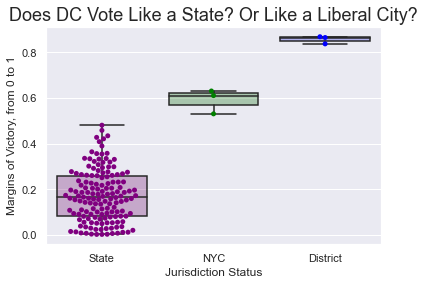

In [31]:
sns.set_theme(style="darkgrid")
my_pal = {"State": "purple", "NYC": "green", "District":"blue"}
ax = sns.boxplot(y="Margins", x="City/State",
                 order=["State", "NYC", "District"],
                 data=plot_data, palette=my_pal)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
ax = sns.swarmplot(y="Margins", x="City/State", 
                 order=["State", "NYC", "District"],
                   data=plot_data, palette=my_pal)

ax.set_title('Does DC Vote Like a State? Or Like a Liberal City?', fontsize=18)
ax.set_ylabel('Margins of Victory, from 0 to 1')
ax.set_xlabel('Jurisdiction Status')
plt.show()